# 1)Import the necessary libraries

In [3]:
# Step 1: Import necessary libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 2)Read the data as a data frame

In [22]:
# Step 2: Read the data as a DataFrame

# Reading the dataset
data_path = 'insurance.csv'
insurance_df = pd.read_csv(data_path)

# First five rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3)Perform basic EDA

In [23]:
# Step 3a: Shape of the data
shape_of_data = insurance_df.shape

shape_of_data

(1338, 7)

In [24]:
# Step 3b: Data types of each attribute
data_types = insurance_df.dtypes

data_types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [25]:
# Step 3c: Checking the presence of missing values
missing_values = insurance_df.isnull().sum()

missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# Step 3d: 5-point summary of numerical attributes (age, bmi, children, charges)
summary_numerical = insurance_df[['age', 'bmi', 'children', 'charges']].describe()

summary_numerical


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


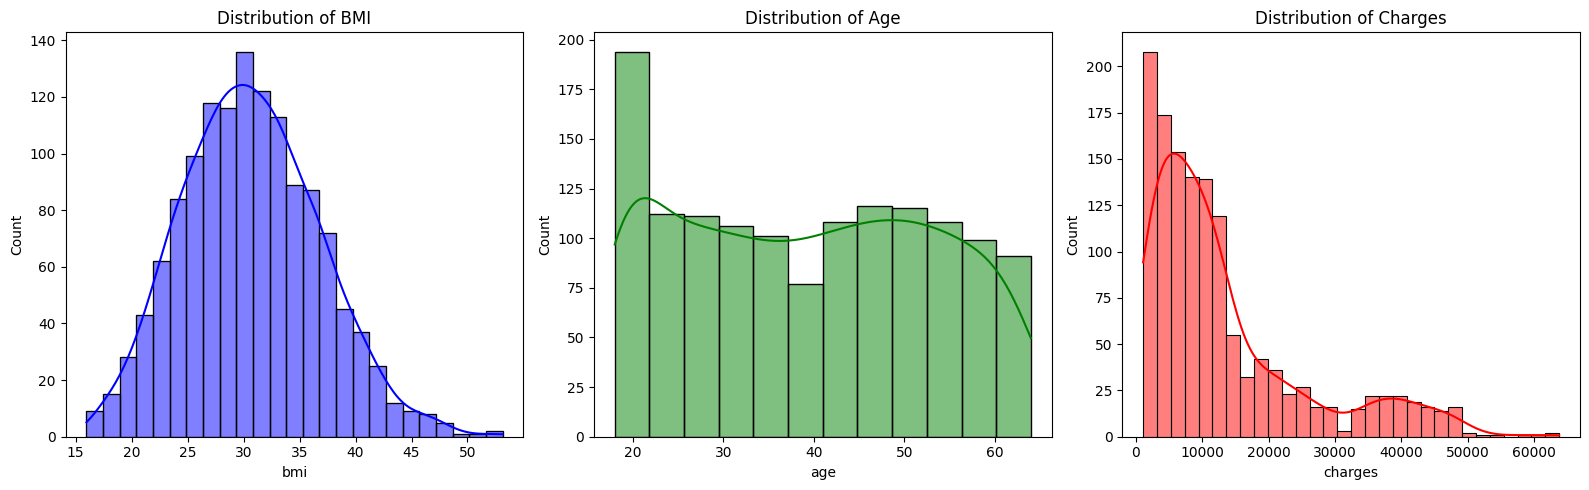

In [27]:
# Step 3e: Distribution of 'bmi', 'age', and 'charges' columns

# Plotting the distributions
plt.figure(figsize=(16, 5))

# Distribution of BMI
plt.subplot(1, 3, 1)
sns.histplot(insurance_df['bmi'], kde=True, color='blue')
plt.title('Distribution of BMI')

# Distribution of Age
plt.subplot(1, 3, 2)
sns.histplot(insurance_df['age'], kde=True, color='green')
plt.title('Distribution of Age')

# Distribution of Charges
plt.subplot(1, 3, 3)
sns.histplot(insurance_df['charges'], kde=True, color='red')
plt.title('Distribution of Charges')

plt.tight_layout()
plt.show()


In [28]:
# Step 3f: Calculate skewness for 'bmi', 'age', and 'charges' columns
skewness_bmi = insurance_df['bmi'].skew()
skewness_age = insurance_df['age'].skew()
skewness_charges = insurance_df['charges'].skew()

skewness_bmi, skewness_age, skewness_charges


(0.2840471105987448, 0.05567251565299186, 1.5158796580240388)

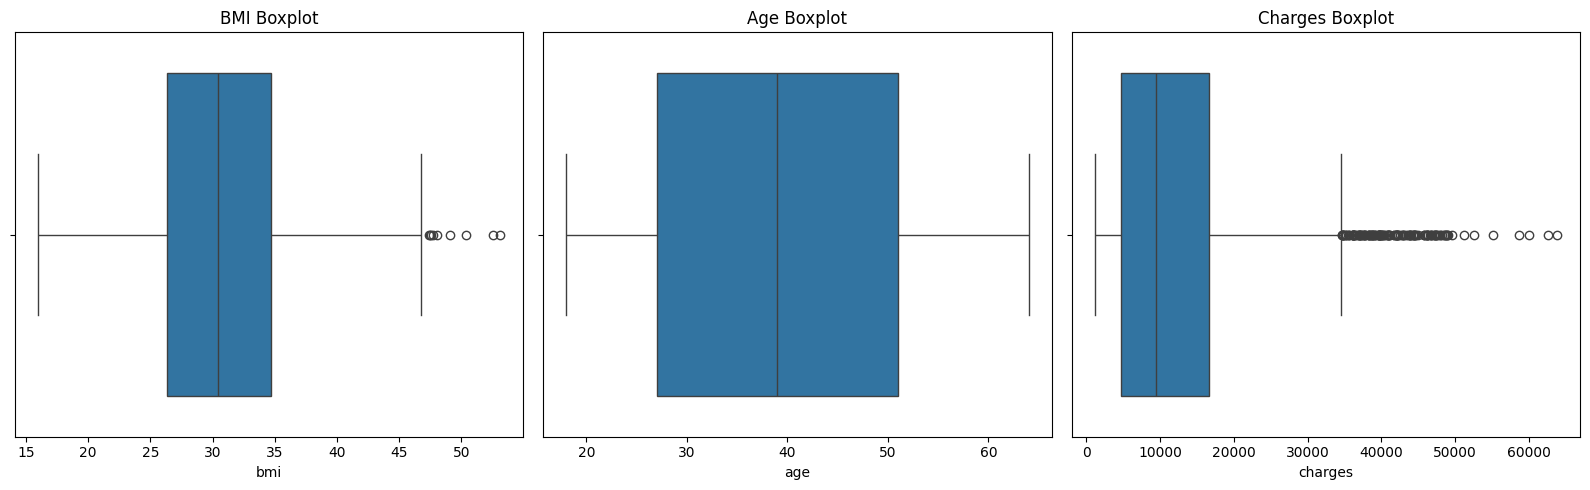

In [29]:
# Step 3g:The presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

# import seaborn as sns
import matplotlib.pyplot as plt

# Plotting boxplots for 'bmi', 'age', and 'charges'
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=insurance_df['bmi'])
plt.title('BMI Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(x=insurance_df['age'])
plt.title('Age Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(x=insurance_df['charges'])
plt.title('Charges Boxplot')

plt.tight_layout()
plt.show()


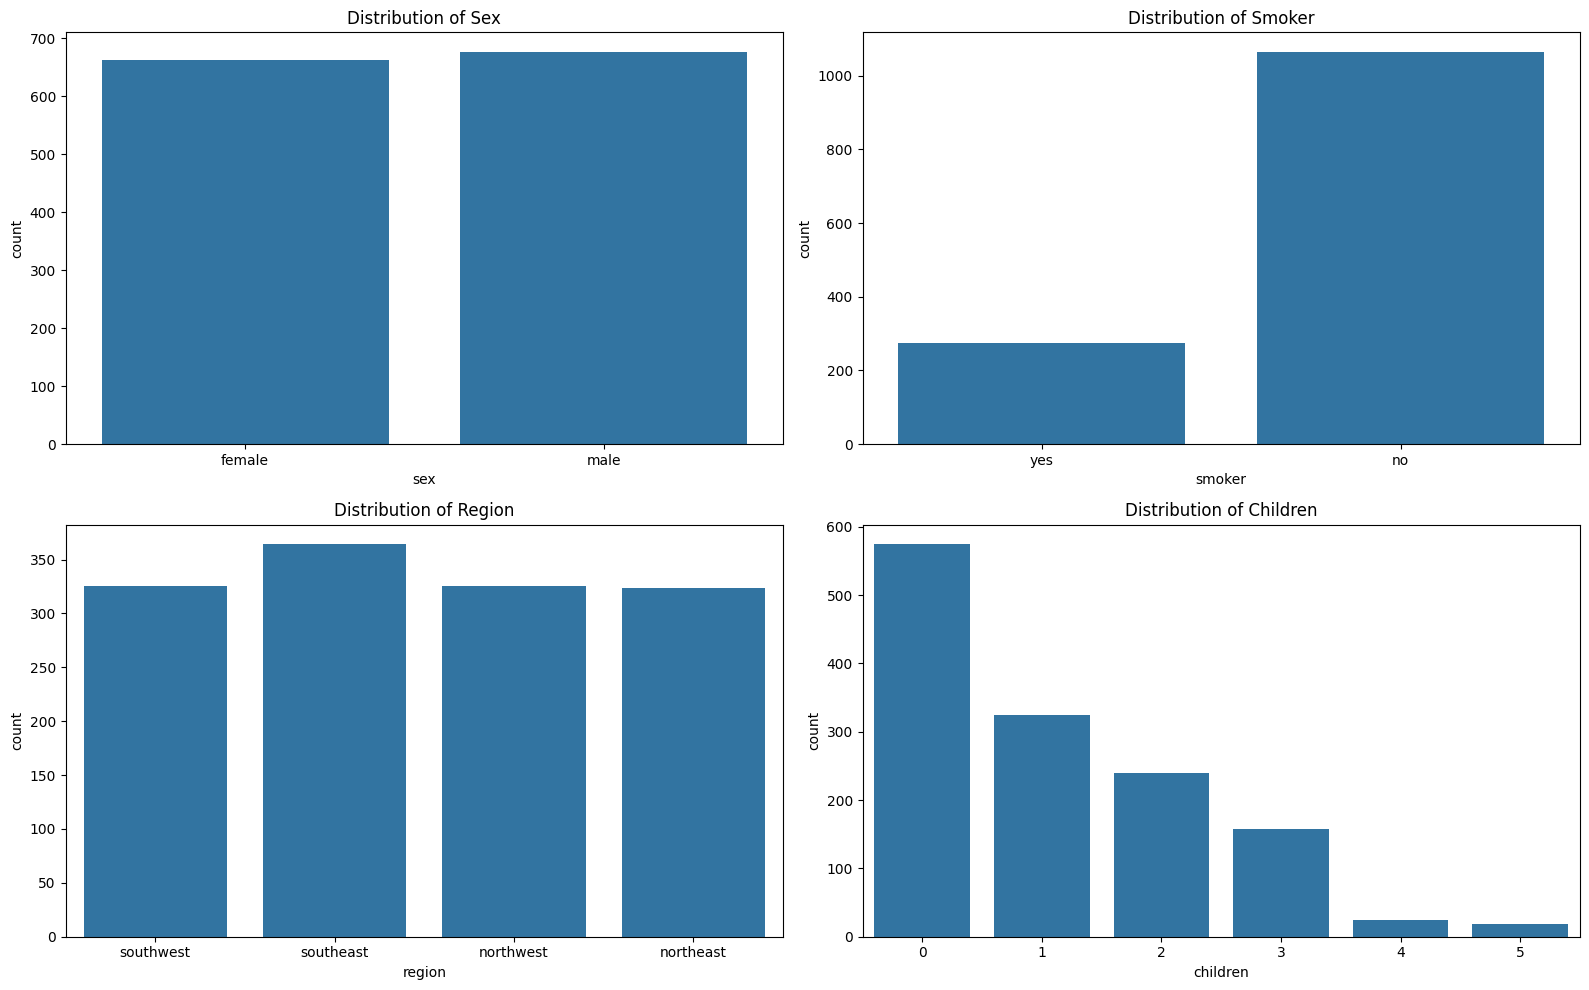

In [30]:
#  Step 3h:Plotting the distribution of categorical columns
plt.figure(figsize=(16, 10))

# Distribution of 'sex'
plt.subplot(2, 2, 1)
sns.countplot(x=insurance_df['sex'])
plt.title('Distribution of Sex')

# Distribution of 'smoker'
plt.subplot(2, 2, 2)
sns.countplot(x=insurance_df['smoker'])
plt.title('Distribution of Smoker')

# Distribution of 'region'
plt.subplot(2, 2, 3)
sns.countplot(x=insurance_df['region'])
plt.title('Distribution of Region')

# Distribution of 'children'
plt.subplot(2, 2, 4)
sns.countplot(x=insurance_df['children'])
plt.title('Distribution of Children')

plt.tight_layout()
plt.show()


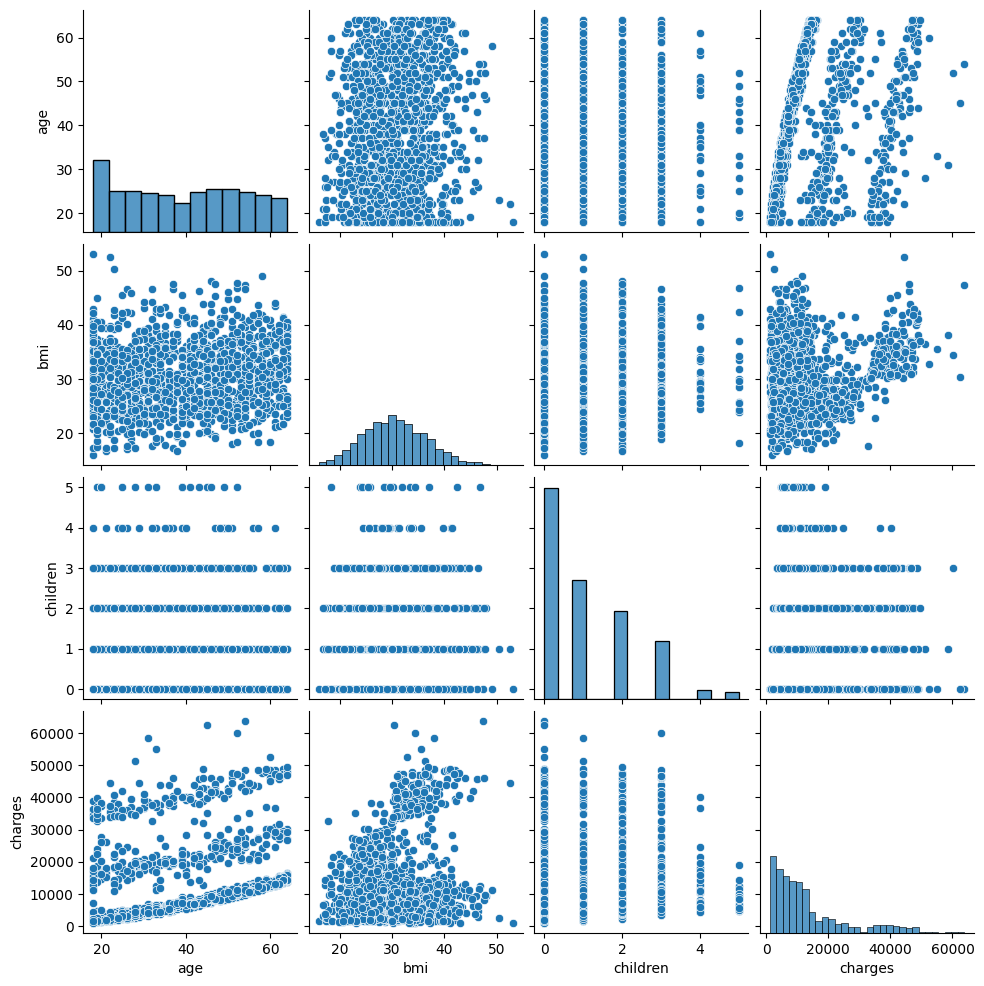

In [31]:
# Step 3i:Plotting the pair plot for all columns
sns.pairplot(insurance_df)
plt.show()


# 4)Statistical Evidence

In [32]:
# Step 4a:Do charges of people who smoke differ significantly from the people who don't?

from scipy.stats import ttest_ind

# Splitting data into smokers and non-smokers
smokers_charges = insurance_df[insurance_df['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_df[insurance_df['smoker'] == 'no']['charges']

# Performing the t-test
t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges, equal_var=False)

t_stat, p_value


(32.751887766341824, 5.88946444671698e-103)

In [33]:
# Step 4b: Does bmi of males differ significantly from that of females?

# Splitting data into males and females
males_bmi = insurance_df[insurance_df['sex'] == 'male']['bmi']
females_bmi = insurance_df[insurance_df['sex'] == 'female']['bmi']

# Performing the t-test
t_stat_bmi, p_value_bmi = ttest_ind(males_bmi, females_bmi, equal_var=False)

t_stat_bmi, p_value_bmi


(1.697027933124022, 0.08992430667834876)

In [34]:
# Step 4c: Is the proportion of smokers significantly different in different genders?

from scipy.stats import chi2_contingency

# Creating a contingency table for smokers and gender
contingency_table = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

# Performing the chi-square test
chi2_stat, p_value_chi, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_value_chi


(7.39291081459996, 0.006548143503580696)

In [35]:
# Step 4d: Is the distribution of bmi across women with no children, one child and two children, the same?

from scipy.stats import f_oneway

# Filtering women and categorizing based on the number of children
women_no_children_bmi = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 0)]['bmi']
women_one_child_bmi = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 1)]['bmi']
women_two_children_bmi = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 2)]['bmi']

# Performing ANOVA
f_stat_bmi, p_value_bmi_children = f_oneway(women_no_children_bmi, women_one_child_bmi, women_two_children_bmi)

f_stat_bmi, p_value_bmi_children


(0.3344720147757968, 0.7158579926754841)